In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder


In [363]:
data = pd.read_csv(r'C:\Users\Ahmed\Desktop\7amo\nti\tasksssss\AB_NYC_2019.csv')
data



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [364]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [365]:
data.size

782320

In [366]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

In [367]:
data.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


In [368]:
data.describe(include="object")

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16256\460854327.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  data.describe(include="object")


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [369]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [370]:
data.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [371]:
data.drop_duplicates(inplace=True)

In [372]:
data.duplicated().sum()

np.int64(0)

In [373]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [374]:
data.dropna(inplace=True)

In [375]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [376]:
data.shape

(38821, 16)

id                                   Axes(0.125,0.11;0.065678x0.77)
host_id                           Axes(0.203814,0.11;0.065678x0.77)
latitude                          Axes(0.282627,0.11;0.065678x0.77)
longitude                         Axes(0.361441,0.11;0.065678x0.77)
price                             Axes(0.440254,0.11;0.065678x0.77)
minimum_nights                    Axes(0.519068,0.11;0.065678x0.77)
number_of_reviews                 Axes(0.597881,0.11;0.065678x0.77)
reviews_per_month                 Axes(0.676695,0.11;0.065678x0.77)
calculated_host_listings_count    Axes(0.755508,0.11;0.065678x0.77)
availability_365                  Axes(0.834322,0.11;0.065678x0.77)
dtype: object

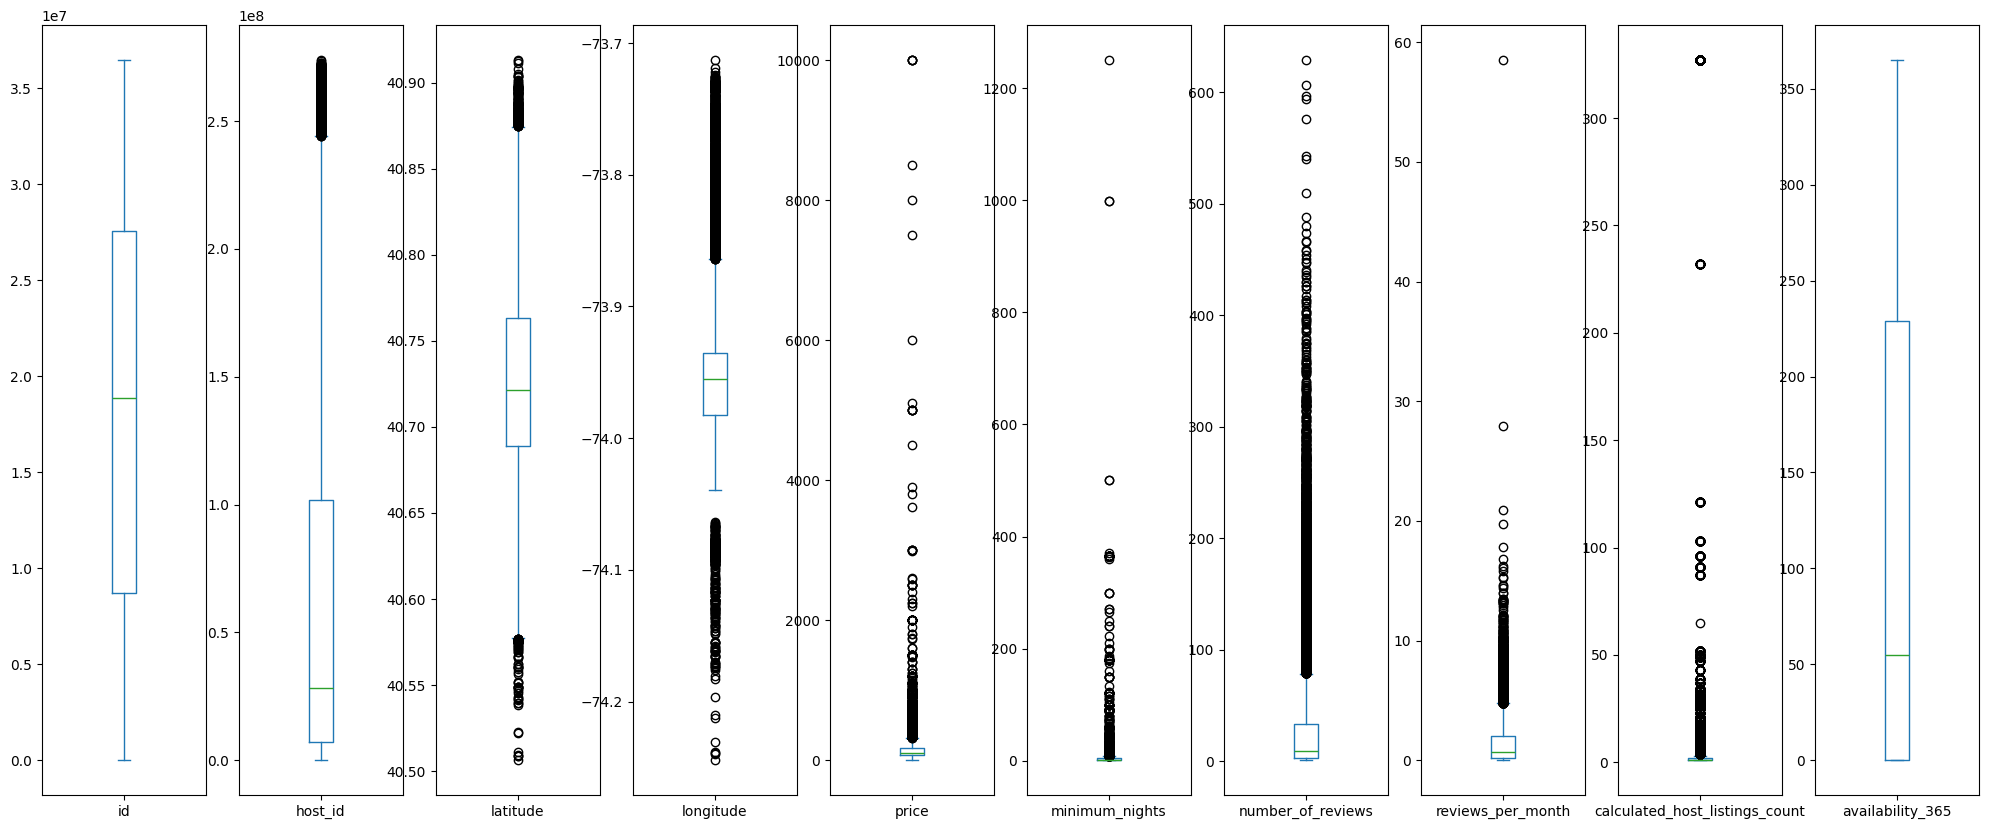

In [377]:
data.plot(kind="box", subplots=True, figsize=(25, 10))

In [378]:
cols = ['price', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data = data[(data[col] >= lower) & (data[col] <= upper)]

In [379]:
data = data[data['price'] < 500]

In [380]:
exclude_cols = ['id', 'host_id', 'latitude', 'longitude']
numeric_cols = data.select_dtypes(include=np.number).columns.difference(exclude_cols)

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower) | (data[col] > upper)].index
    
    data.drop(index=outliers, inplace=True)
data.reset_index(drop=True, inplace=True)

print("Final shape:", data.shape)

Final shape: (14379, 16)


id                                   Axes(0.125,0.11;0.065678x0.77)
host_id                           Axes(0.203814,0.11;0.065678x0.77)
latitude                          Axes(0.282627,0.11;0.065678x0.77)
longitude                         Axes(0.361441,0.11;0.065678x0.77)
price                             Axes(0.440254,0.11;0.065678x0.77)
minimum_nights                    Axes(0.519068,0.11;0.065678x0.77)
number_of_reviews                 Axes(0.597881,0.11;0.065678x0.77)
reviews_per_month                 Axes(0.676695,0.11;0.065678x0.77)
calculated_host_listings_count    Axes(0.755508,0.11;0.065678x0.77)
availability_365                  Axes(0.834322,0.11;0.065678x0.77)
dtype: object

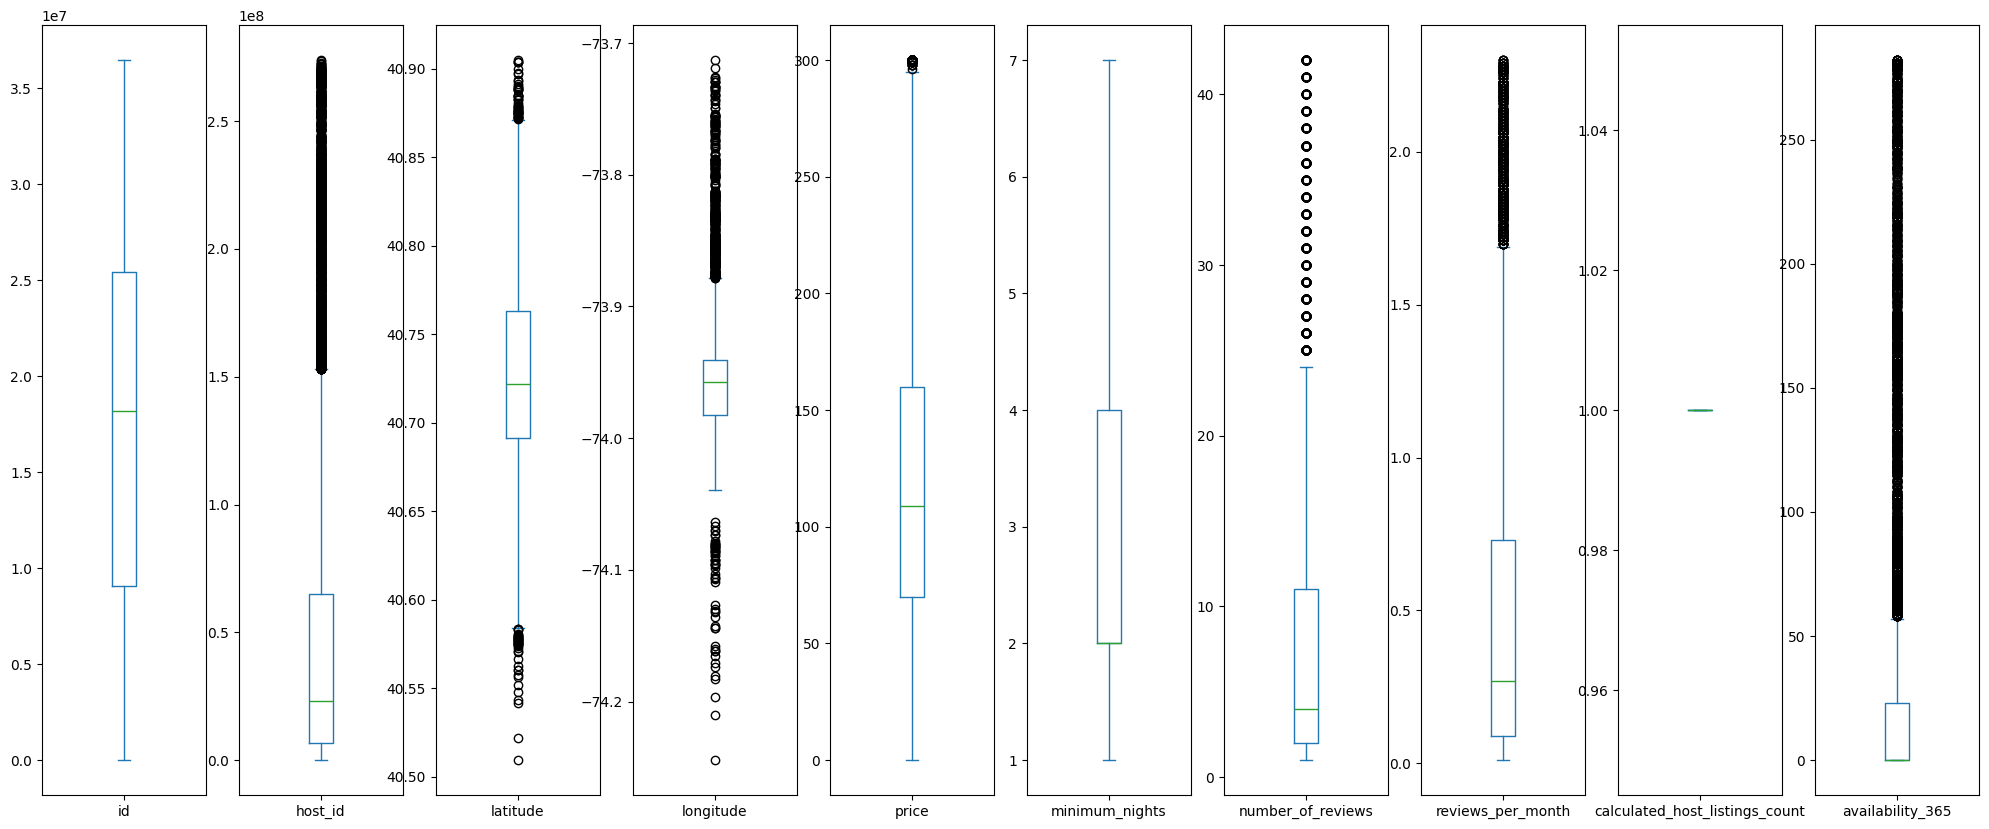

In [381]:
data.plot(kind="box", subplots=True, figsize=(25, 10))

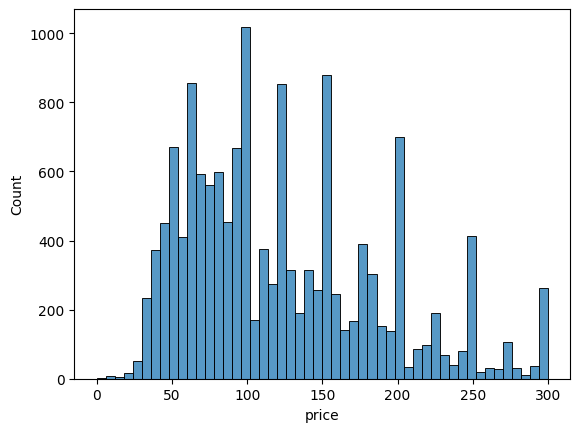

In [382]:
sns.histplot(data['price'], bins=50)
plt.show()

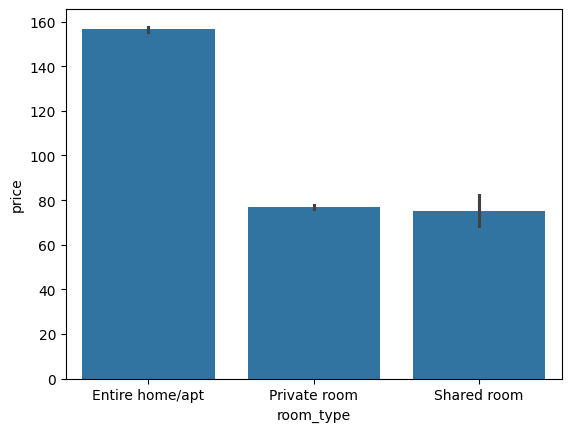

In [383]:
sns.barplot(x='room_type', y='price', data=data)
plt.show()

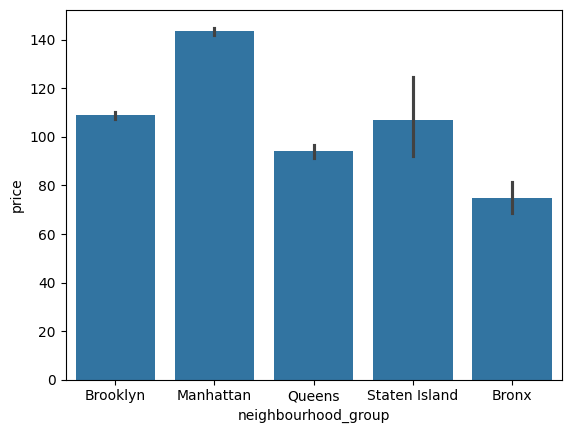

In [384]:
sns.barplot(x='neighbourhood_group', y='price', data=data)
plt.show()

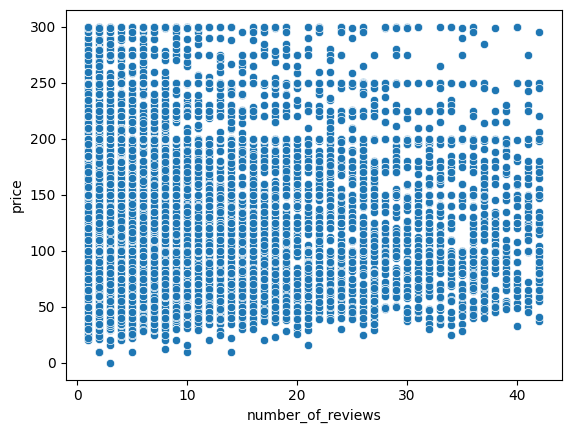

In [385]:
sns.scatterplot(x='number_of_reviews', y='price', data=data)
plt.show()

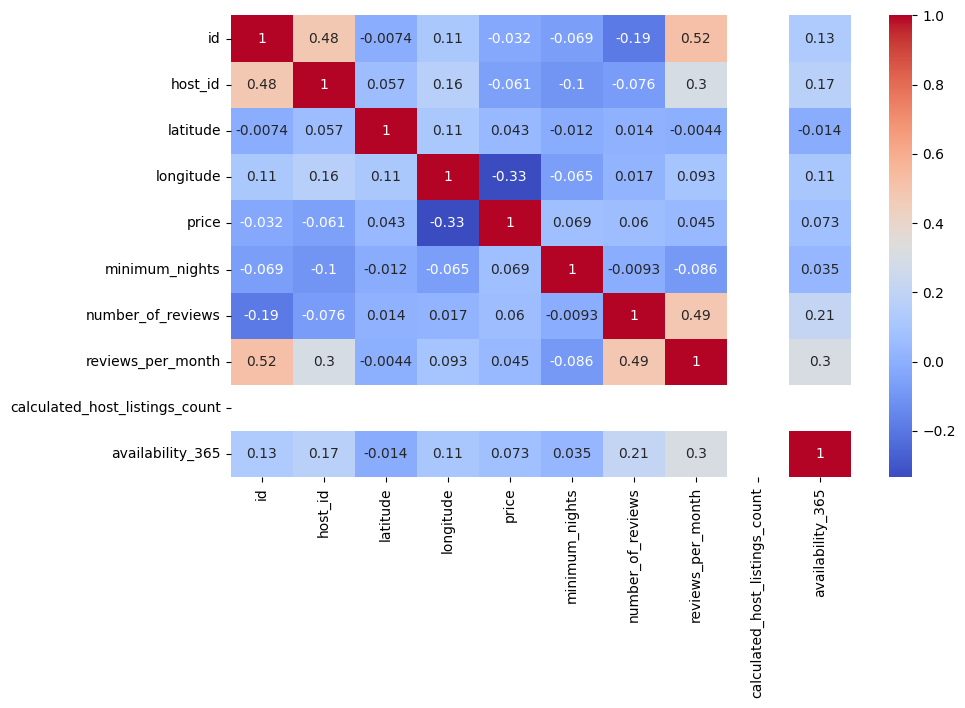

In [386]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [387]:
cols = ['price'] + [c for c in data.columns if c != 'price']
data = data[cols]


In [388]:

data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


data.drop(['host_id'], axis=1, inplace=True)

categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data.drop('price', axis=1)
y = data['price']


In [389]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.71842,-73.95718,3,9,0.07,1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,40.68554,-73.94090,3,11,0.10,1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,40.73961,-73.98074,7,19,0.22,1,257,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,40.71185,-73.96204,2,42,0.38,1,263,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,40.67343,-73.98338,3,4,0.16,1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14374,40.71825,-73.99019,4,1,1.00,1,13,False,True,False,...,False,False,False,False,False,False,False,False,False,False
14375,40.78099,-73.95366,1,1,1.00,1,147,False,True,False,...,False,False,False,False,False,False,False,False,True,False
14376,40.54179,-74.14275,1,1,1.00,1,87,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14377,40.80787,-73.92400,1,2,2.00,1,40,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [390]:

X = data.drop('price', axis=1)
y = data['price']



In [391]:
y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.25, random_state=0
)

In [392]:
model = RandomForestRegressor(
    n_estimators=350, max_depth=30, random_state=42, n_jobs=-1
 )
model.fit(X_train, y_train_log)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",350
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",30
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [393]:
y_pred_log = model.predict(X_test)


y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

In [394]:
y_pred

array([138.91083252, 104.26228087,  68.46797928, ..., 187.43700275,
        59.73639457,  62.43238023], shape=(3595,))

In [395]:
def plot_results(y, y_pred):
    plt.figure(figsize=(6,6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs Predicted")
    plt.show()


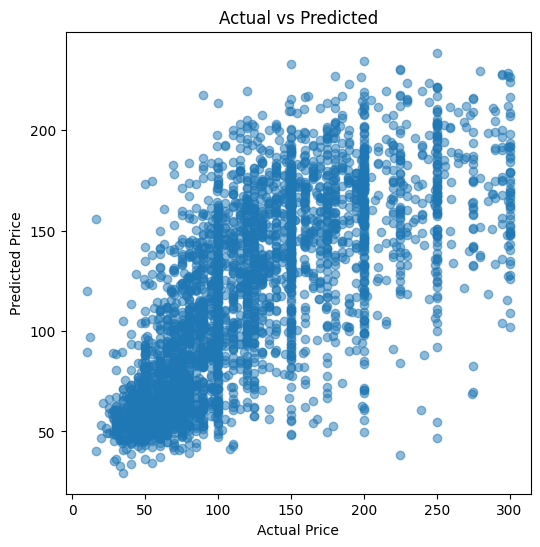

In [396]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)
plot_results(y_test, y_pred)


In [397]:
pred_log = model.predict(X_test)

In [398]:
pred_train_log = model.predict(X_train)
y_train = np.expm1(y_train_log)
pred_train = np.expm1(pred_train_log)

r2 = r2_score(y_train, pred_train)
r2_percent = r2 * 100
print("R2 Train (%):", r2_percent)



R2 Train (%): 91.30432393578009
